# Machine Learning

This chapter provides a very quick overview of the main concepts in machine learning, mostly to refresh some of the concepts or models that will be used throughout this book.

## Supervised Learning vs. Unsupervised Learning

In supervised learning, the model is trained on a labeled dataset, meaning that each training example is composed by input features ($\mathbf{X}$) and labels ($\mathbf{y}$). The goal is to learn the function relating the labels to the input features. Common tasks in supervised learning include:
- **Regression**: predicting a continuous value. Example: Predicting house prices based on features like size, location, and age.
- **Classification**: predicting a discrete label. Example: Identifying whether an email is spam or not based on its content.

In unsupervised learning, the model is usually trained on unlabeled examples (only the features $\mathbf{X}$). The goal can be to infer the latent structure present within a set of data points. Common tasks in unsupervised learning include:
- **Clustering**: grouping similar data points together. Example: Customer segmentation based on purchasing behavior.
- **Dimensionality Reduction**: reducing the number of features while retaining the most important information. Example: Principal Component Analysis (PCA) for visualizing high-dimensional data.

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


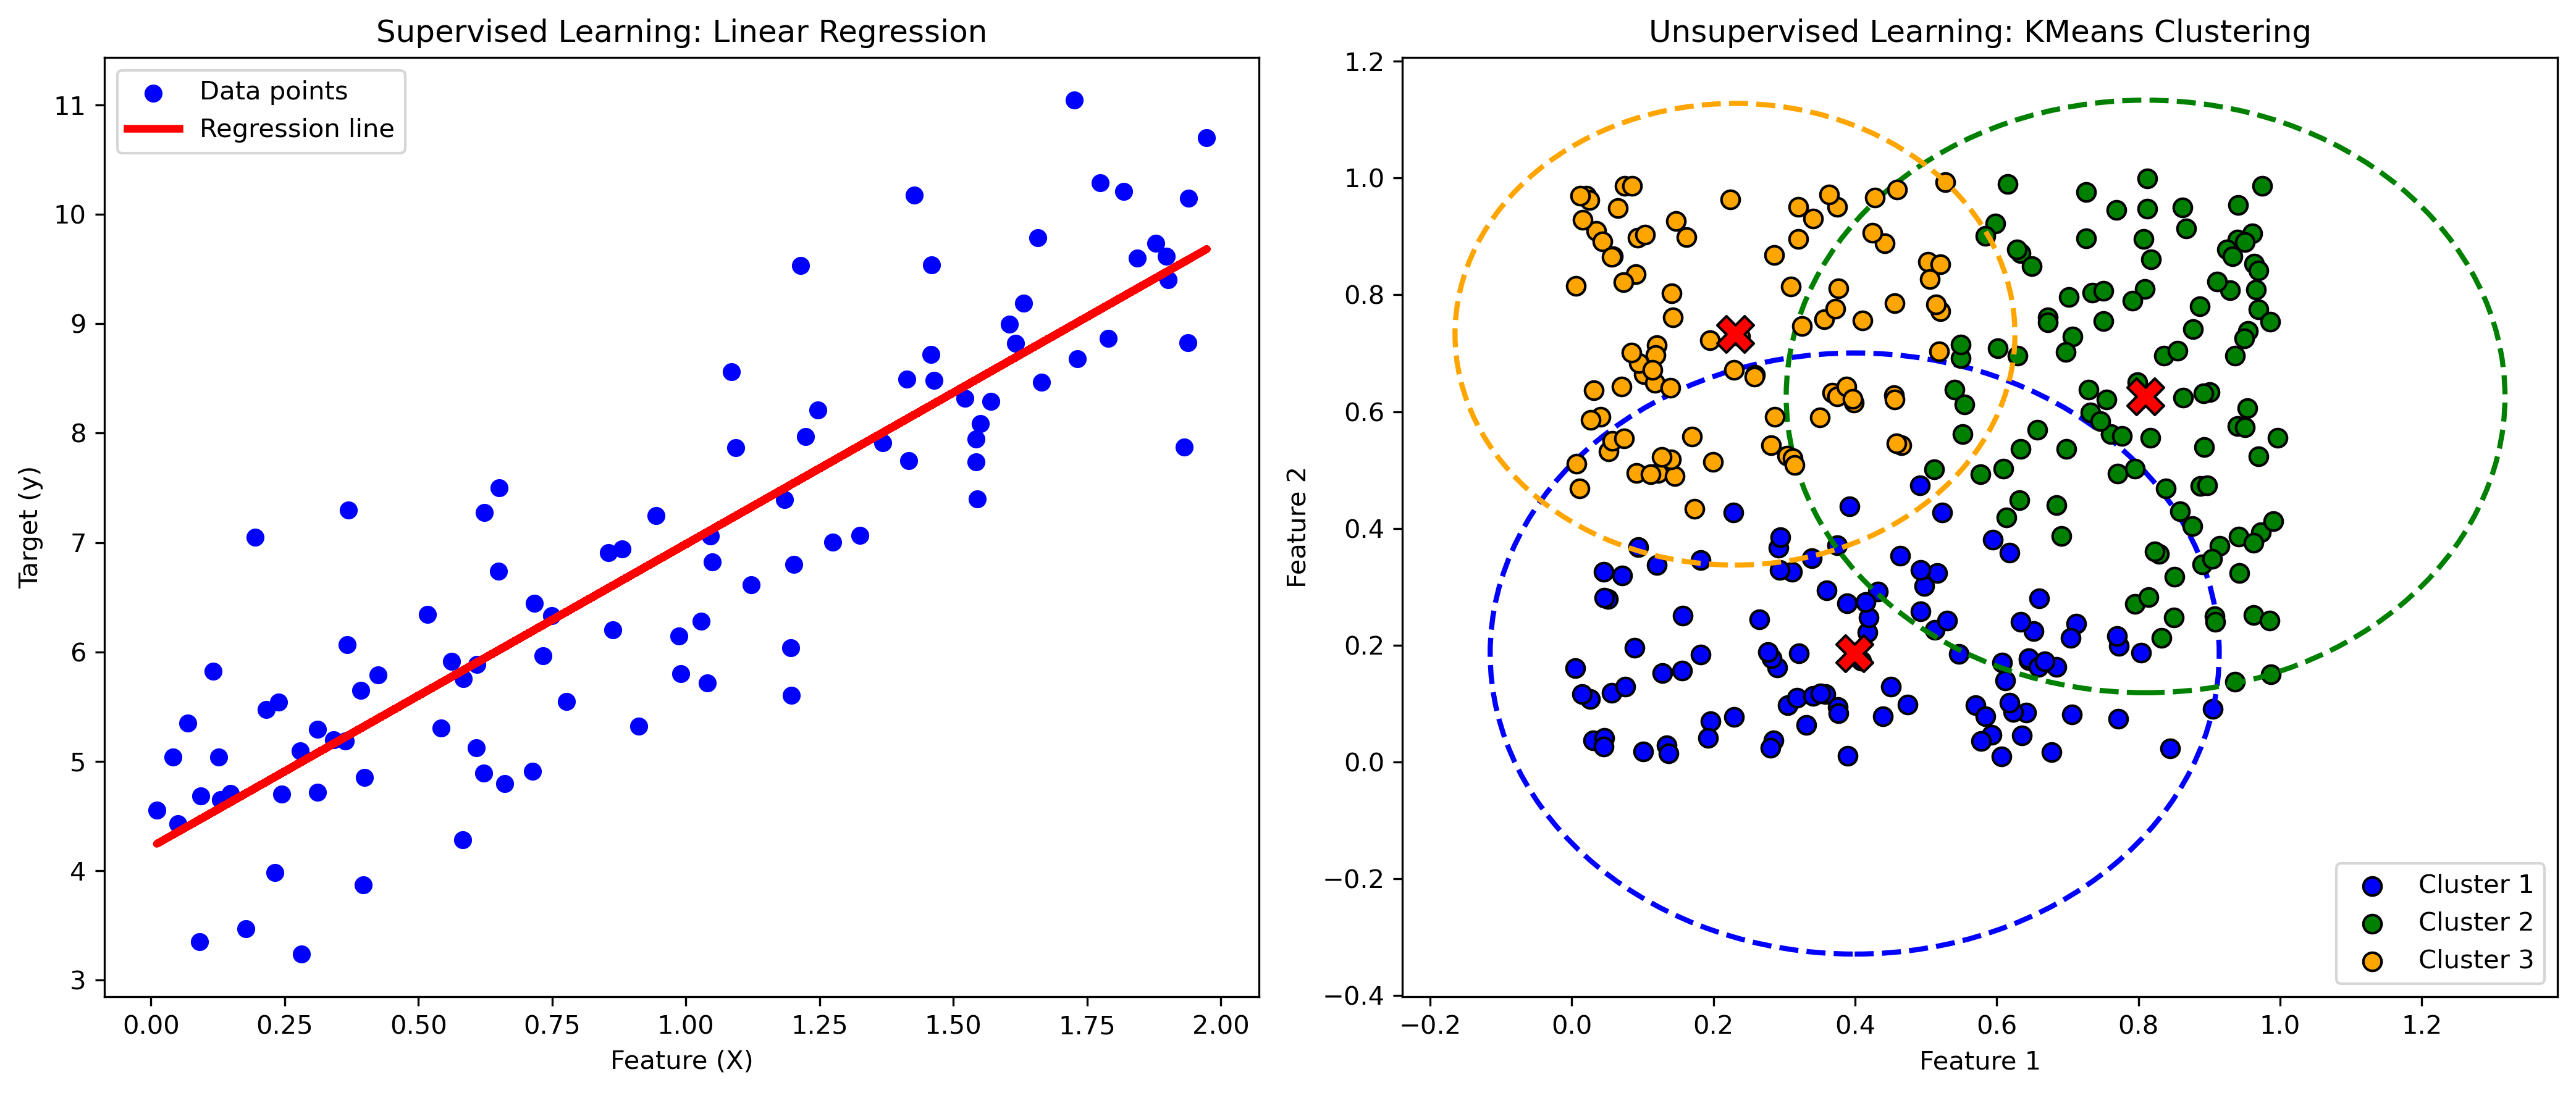

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

# Generate synthetic data for regression (supervised learning)
np.random.seed(42)
X_reg = 2 * np.random.rand(100, 1)
y_reg = 4 + 3 * X_reg + np.random.randn(100, 1)

# Train a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_reg, y_reg)
y_pred = lin_reg.predict(X_reg)

# Generate synthetic data for clustering (unsupervised learning)
np.random.seed(42)
X_cluster = np.random.rand(300, 2)
# Define true cluster centers
true_centers = np.array([[0.2, 0.8], [0.8, 0.2], [0.5, 0.5]])
# Assign data points to clusters
y_cluster = np.argmin(np.linalg.norm(X_cluster[:, np.newaxis] - true_centers, axis=2), axis=1)

# Train a KMeans clustering model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_cluster)
y_kmeans = kmeans.predict(X_cluster)

# Plot regression results
plt.figure(figsize=(14, 6), dpi=300)

plt.subplot(1, 2, 1)
plt.scatter(X_reg, y_reg, color='blue', label='Data points')
plt.plot(X_reg, y_pred, color='red', label='Regression line', lw=3)
plt.title('Supervised Learning: Linear Regression')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()

# Plot clustering results
plt.subplot(1, 2, 2)
colors = ['blue', 'green', 'orange']
for i in range(3):
    plt.scatter(X_cluster[y_kmeans == i, 0], X_cluster[y_kmeans == i, 1], s=50, c=colors[i], label=f'Cluster {i+1}', edgecolor='k')
    plt.scatter(kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1], s=200, c='red', marker='X', edgecolor='k')

    # Draw circle around each cluster
    cluster_center = kmeans.cluster_centers_[i]
    cluster_points = X_cluster[y_kmeans == i]
    radius = np.max(np.linalg.norm(cluster_points - cluster_center, axis=1))
    circle = plt.Circle(cluster_center, radius, color=colors[i], fill=False, linestyle='--', linewidth=2)
    plt.gca().add_patch(circle)

plt.title('Unsupervised Learning: KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.tight_layout()
plt.show()


## Overfitting and Underfitting

Overfitting occurs when a model learns not only the underlying patterns in the training data but also the noise and random fluctuations. This excessive learning leads the model to perform exceptionally well on the training data, but poorly on unseen or new data, such as validation or test datasets. Overfitting is more likely to happen when the model is overly complex relative to the amount of training data it has been given. Complexity can come from having too many features, using high-degree polynomial models, or incorporating too many parameters. The characteristics of overfitting are:
- **High training accuracy, low test accuracy**: the model fits the training data very well but generalizes poorly to new data.
- **Complex models**: models with a large number of parameters or high-degree polynomials are prone to overfitting.
- **Noise fitting**: the model captures noise and random variations in the training data as if they were true patterns.

Mitigation strategies might include:
- **Regularization**: techniques like Lasso (L1 penalty), Ridge (L2 penalty), and Elastic Net add a penalty for larger coefficients, thus discouraging overly complex models.
- **Pruning**: in decision trees, pruning helps by cutting off branches that have little importance.
- **Cross-validation**: using techniques like k-fold cross-validation ensures that the model performs well on different subsets of the data.
- **Simpler models**: choosing simpler models with fewer parameters can reduce the risk of overfitting.
- **More data**: increasing the size of the training data can help the model generalize better.

### Underfitting
Underfitting occurs when a model is too simple to capture the underlying patterns and structure of the data. This simplicity can arise from using too few features, having a low-degree polynomial, or having an overly simplistic model structure. An underfitted model will perform poorly on both the training data and new data because it fails to capture the essential trends and relationships within the data. The characteristics of underfitting are:
- **Low training accuracy, low test accuracy**: the model does not perform well even on the training data, indicating it has not captured the underlying patterns.
- **Simple models**: models with too few parameters, low-degree polynomials, or insufficient features.
- **Bias**: the model has high bias and cannot adequately represent the complexity of the data.

Mitigation strategies might include:
- **Complexity**: increase the complexity of the model by adding more features, using higher-degree polynomials, or more complex algorithms.
- **Feature engineering**: create new features that better capture the underlying patterns in the data.
- **Model tuning**: adjust hyperparameters to better fit the data.
- **Increase training**: ensure the model is adequately trained by allowing more iterations or using more sophisticated training techniques.

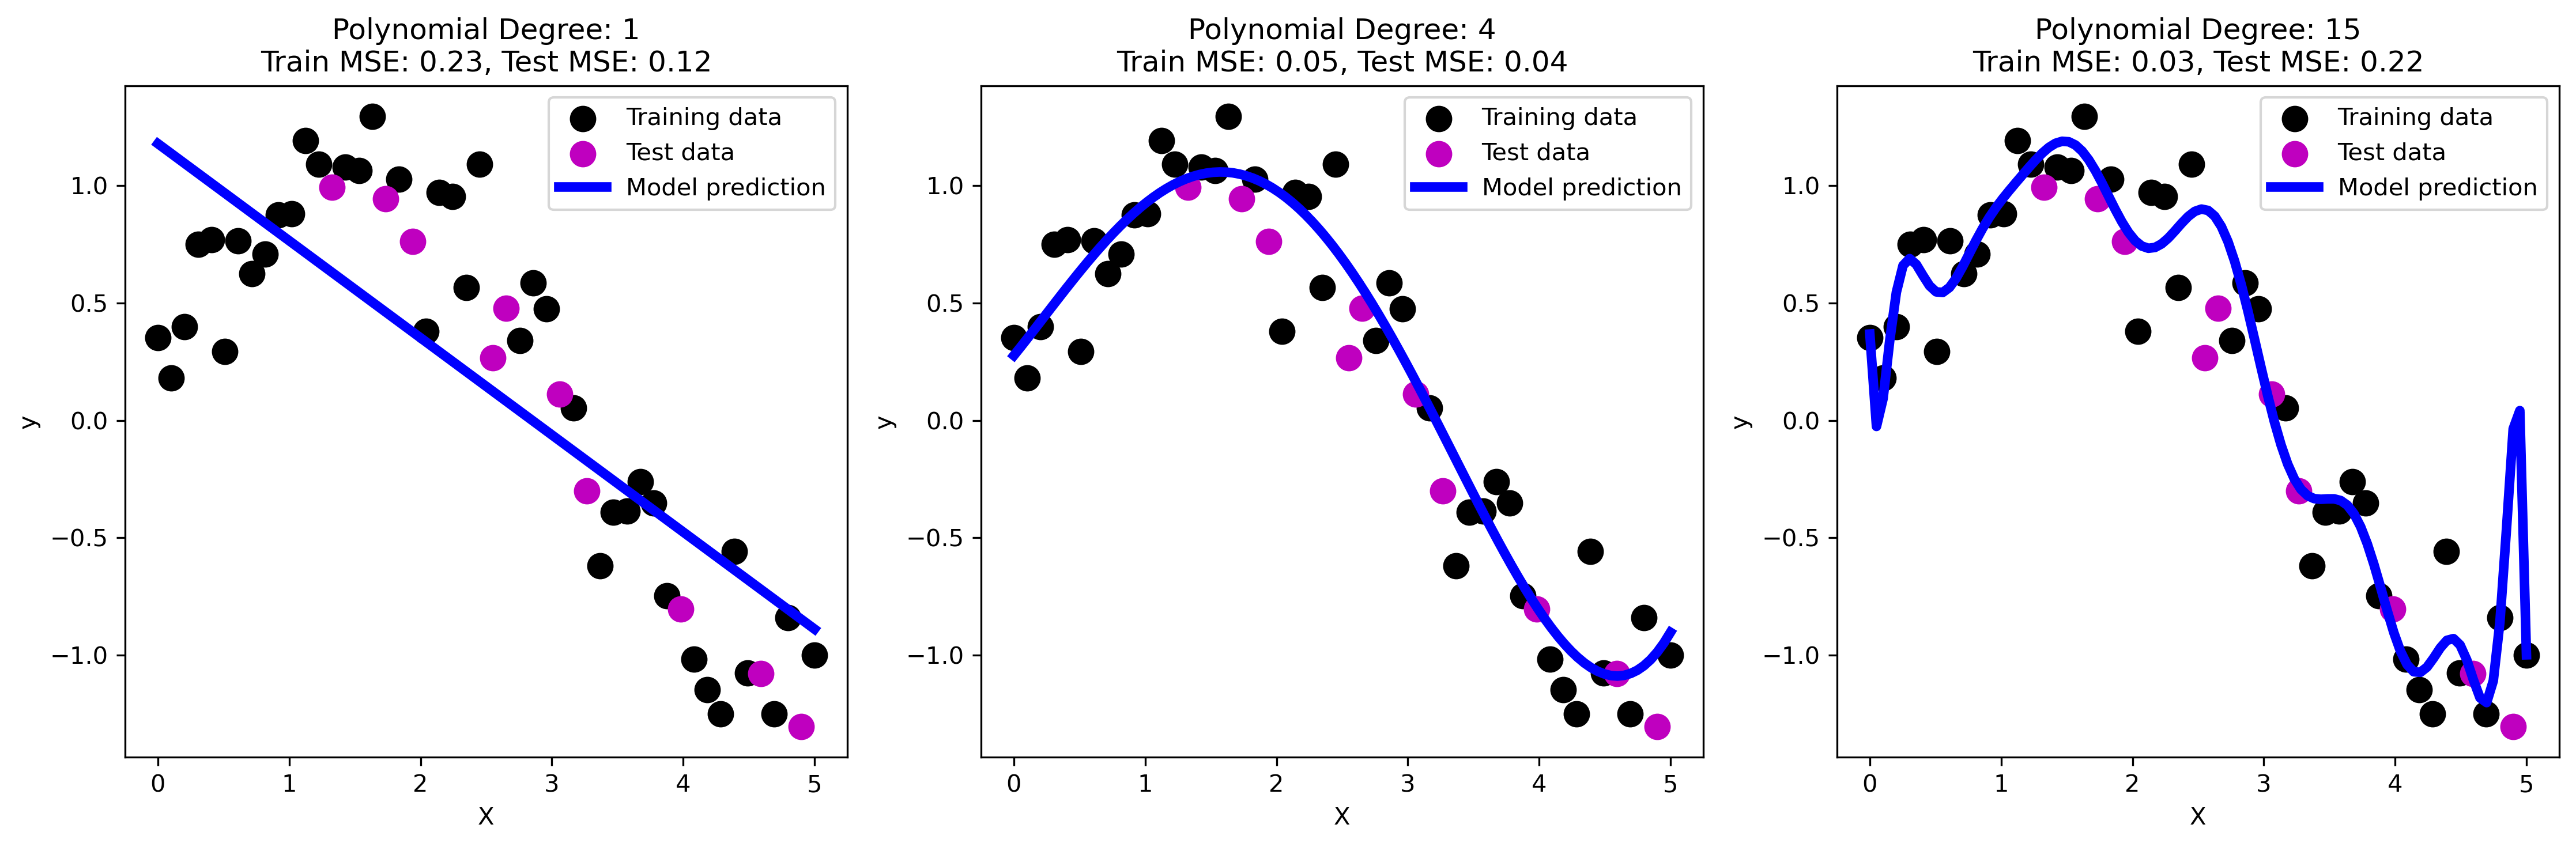

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(0)
X = np.linspace(0, 5, num=50).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.randn(50) * 0.2

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to plot model
def plot_models(degrees, X_train, y_train, X_test, y_test):
    plt.figure(figsize=(15, 5), dpi=300)
    
    for i, degree in enumerate(degrees, start=1):
        polynomial_features = PolynomialFeatures(degree=degree)
        X_train_poly = polynomial_features.fit_transform(X_train)
        X_test_poly = polynomial_features.fit_transform(X_test)
        
        model = LinearRegression()
        model.fit(X_train_poly, y_train)
        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)
        
        # Plotting the fitted line using the whole range of X for a smoother curve
        X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        X_plot_poly = polynomial_features.transform(X_plot)
        y_plot_pred = model.predict(X_plot_poly)
        
        plt.subplot(1, len(degrees), i)
        plt.scatter(X_train, y_train, label='Training data', c='k', s=100)
        plt.scatter(X_test, y_test, label='Test data', c='m', s=100)
        plt.plot(X_plot, y_plot_pred, color='b', label='Model prediction', lw=4)
        plt.title(f'Polynomial Degree: {degree}\nTrain MSE: {mean_squared_error(y_train, y_train_pred):.2f}, Test MSE: {mean_squared_error(y_test, y_test_pred):.2f}')
        plt.xlabel('X')
        plt.ylabel('y')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# Plotting models
degrees = [1, 4, 15]
plot_models(degrees, X_train, y_train, X_test, y_test)

The three plots above illustrate the concepts of underfitting, good fit, and overfitting using polynomial regression models of varying degrees.

1. **Underfitting**: the first plot shows a linear regression model (polynomial degree 1). The model is too simple to capture the underlying nonlinear relationship in the data, resulting in high bias. This is evident from the high training and test mean squared error (MSE). The model fails to capture the curve in the data, leading to underfitting.

2. **Good fit**: the second plot represents a polynomial regression model with degree 4. This model captures the underlying pattern of the data well, striking a balance between bias and variance. The training and test MSEs are relatively low, indicating that the model generalizes well to new data. This is an example of an optimal fit where the model complexity is appropriate for the data.

3. **Overfitting**: the third plot shows a polynomial regression model with degree 15. The model is overly complex, capturing not only the underlying pattern but also the noise in the training data. This leads to low training MSE but significantly higher test MSE, as the model does not generalize well to new data. This high variance results in poor performance on the test set, exemplifying overfitting.

These plots clearly demonstrate how model complexity affects the ability to generalize, emphasizing the importance of finding a balance to avoid both underfitting and overfitting.

## Tree-based Methods

So far, we mostly covered the use of linear models. Let's now briefly introduce another powerful class of models, that will be used in the book. Tree-based methods are powerful tools for both regression and classification tasks. They involve segmenting the predictor space into a number of simple regions, and making predictions based on these regions. Decision trees are a type of tree-based method that can handle complex data structures and relationships.

### Decision Trees
The decision tree is the most simple tree-based model. It is a non-parametric model that splits the data into subsets based on the value of the features, creating a tree-like structure. A decision tree is composed of nodes and branches. Each internal node represents a test on an attribute, each branch represents the outcome of the test, and each leaf node represents a predicted value. The tree grows by splitting nodes into child nodes, based on the values of input features. The goal is to reduce the impurity at each step. The most common algorithm for regression trees is CART (Classification and Regression Trees). The quality of a split is measured using metrics like mean squared error (MSE) or mean absolute error (MAE). The key advantages of decision trees include:
- **Interpretability**: decision trees are easy to interpret and visualize.
- **Non-linearity**: they can capture non-linear relationships between features and the target variable.
- **Little data preprocessing**: they can handle both numerical and categorical data.
- **Feature importance**: trees provide insights into feature importance based on how often and effectively features are used to split the data.

Let's build and visualise a simple decision tree for a regression task using synthetic data.

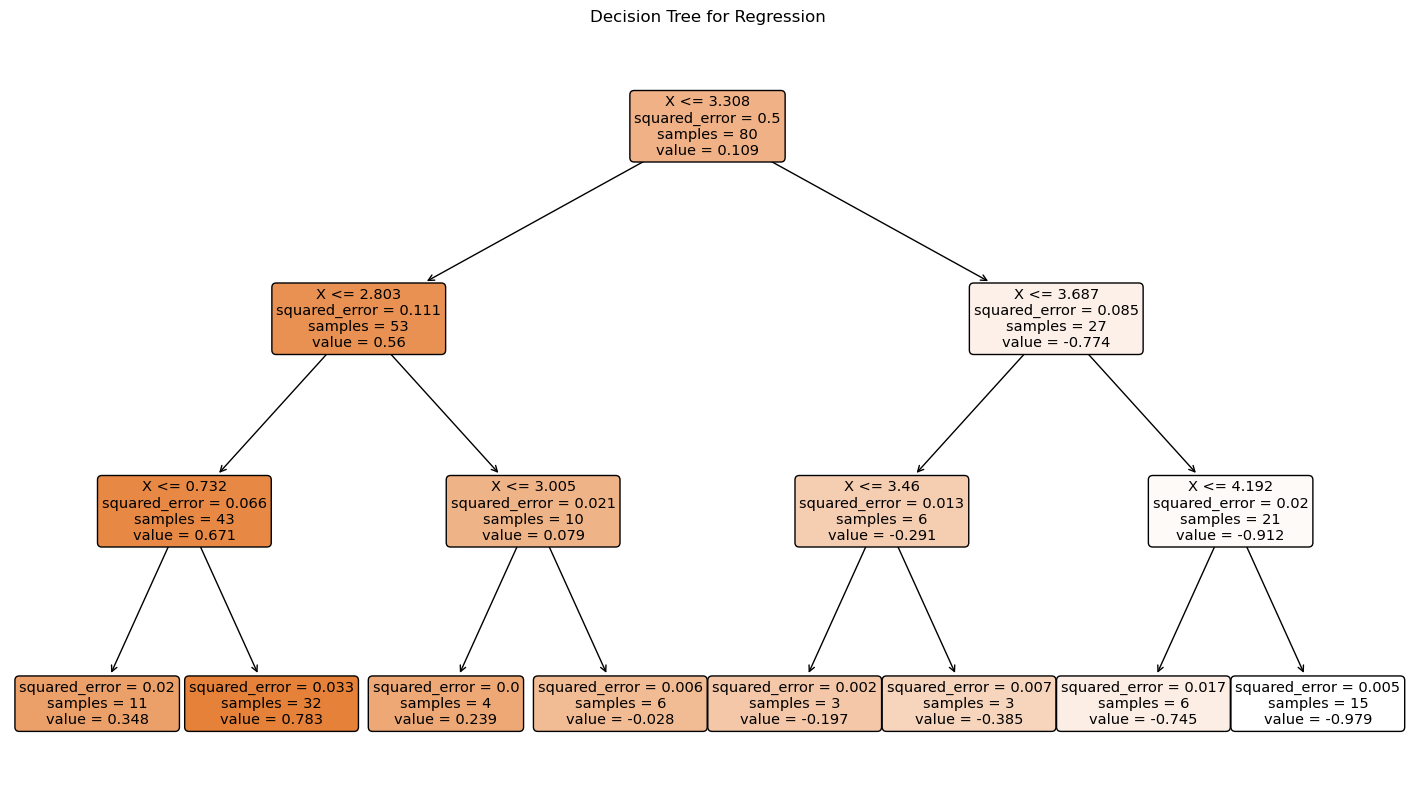

In [3]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 5, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.randn(100) * 0.1

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a decision tree regressor
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(18, 10))
plot_tree(tree_reg, filled=True, feature_names=["X"], rounded=True)
plt.title('Decision Tree for Regression')
plt.show()

The decision tree plot shows how the data is split at each node based on the input feature $X$. Each internal node represents a decision based on the value of $X$, and each leaf node shows the predicted value of $y$. The tree provides a clear and interpretable way to understand how the predictions are made based on the input features.

### Random Forests

Random Forests are an ensemble learning method that combines multiple decision trees to improve the predictive performance and control overfitting. The key idea is to build a "forest" of decision trees, where each tree is trained on a random subset of the data and a random subset of features. The key concepts behind random forests are:

1. **Bootstrap aggregating (bagging)**: random forests use bagging, where multiple subsets of the data are sampled with replacement to train each tree independently. Mathematically, if the original dataset has $n$ samples, each tree is trained on a bootstrap sample of $n$ samples, drawn with replacement.

   $$
   \text{Bootstrap Sample} = \{ x_i \}_{i=1}^{n} \quad \text{where} \quad x_i \sim \mathcal{D}
   $$

2. **Feature randomness**: at each split in the decision trees, a random subset of features is considered, introducing further randomness and reducing correlation between the trees. If there are $p$ features, a typical number of features considered at each split is $m = \sqrt{p}$ for classification or $m = \frac{p}{3}$ for regression.

   $$
   \text{Random Subset of Features} = \{ X_j \}_{j=1}^{m} \quad \text{where} \quad m \leq p
   $$

3. **Voting mechanism**: for regression tasks, the final prediction is the average of the predictions from all individual trees, while for classification tasks, the majority vote is taken.

   $$
   \text{Regression Prediction} = \frac{1}{T} \sum_{t=1}^{T} \hat{y}_t(x)
   $$

   $$
   \text{Classification Prediction} = \text{mode}\left(\{ \hat{y}_t(x) \}_{t=1}^{T} \right)
   $$

The ensemble approach employed by random forests reduces the variance and the risk of overfitting compared to individual decision trees. Indeed, aggregating multiple trees often leads to better predictive performance. Moreover, random forests provide insights into feature importance by evaluating the average decrease in impurity over all trees.

For classification, a common impurity measures are Gini impurity and entropy, which is defined for a node $t$ as:

  $$
  G(t) = 1 - \sum_{i=1}^{C} p_i^2
  $$

  where $p_i$ is the probability of class $i$ at node $t$, and $C$ is the number of classes.

For regression, the impurity measure is typically the **variance**, which is defined for a node $t$ as:

  $$
  \sigma^2(t) = \frac{1}{N_t} \sum_{i=1}^{N_t} (y_i - \bar{y})^2
  $$

  where $N_t$ is the number of samples in node $t$, $y_i$ is the target value for the $i$-th sample, and $\bar{y}$ is the mean target value in node $t$.


**Feature importance** in random forests is calculated based on the mean decrease in impurity. For a feature $X_j$:

$$
\text{Importance}(X_j) = \frac{1}{T} \sum_{t=1}^{T} \sum_{k \in \text{nodes}} \Delta I_k(X_j)
$$

where $\Delta I_k(X_j)$ is the decrease in impurity at node $k$ due to split on feature $X_j$, and $T$ is the total number of trees in the forest.

The bar plot below shows the importance scores of each feature used in a random forest model fitted to synthetic data. Each bar represents a feature, and its height indicates the relative importance of that feature in predicting the target variable. Higher bars correspond to features that are more important for the model. These features contribute more significantly to reducing the impurity of the splits in the decision trees. Understanding feature importance can provide insights into the underlying data structure and guide feature selection or engineering efforts.

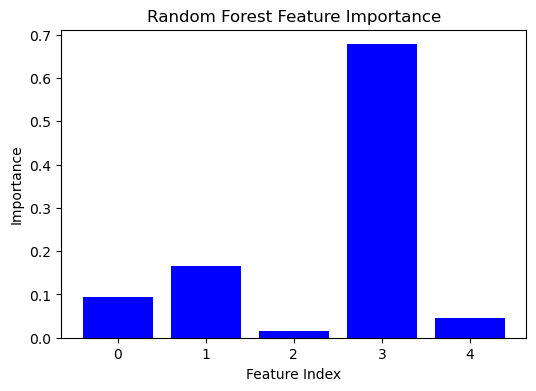

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 5)
y = X @ [1.5, -2, 0, 3.5, -1] + np.random.randn(100) * 0.1

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a random forest regressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

# Extract and plot feature importance
importances = forest_reg.feature_importances_
features = np.arange(X.shape[1])
plt.figure(figsize=(6, 4))
plt.bar(features, importances, color='b', align='center')
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.show()

### XGBoost

XGBoost (Extreme Gradient Boosting) is an advanced implementation of gradient boosting, designed for speed and performance. It builds decision trees sequentially, where each tree attempts to correct the errors of the previous trees. The key concepts of XGBoost are:

1. **Gradient boosting**: the method sequentially builds trees by fitting the residual errors of the previous trees. Each tree tries to minimize a loss function by using gradient descent. The objective is to minimize the following loss function:

   $$
   \mathcal{L} = \sum_{i=1}^{n} l(y_i, \hat{y}_i^{(t)}) + \sum_{k=1}^{t} \Omega(f_k)
   $$

   where $l$ is a differentiable loss function (e.g., mean squared error for regression, log loss for classification), $\hat{y}_i^{(t)}$ is the prediction at the $t$-th iteration, and $\Omega$ is a regularization term for the complexity of the trees $f_k$.

2. **Regularization**: XGBoost incorporates regularization to prevent overfitting, making it more robust than traditional gradient boosting methods. The regularization term $\Omega$ is given by:

   $$
   \Omega(f) = \gamma T + \frac{1}{2} \lambda \sum_{j=1}^{T} w_j^2
   $$

   where $T$ is the number of leaves in the tree, $w_j$ are the leaf weights, $\gamma$ is a regularization parameter for the number of leaves, and $\lambda$ is a regularization parameter for the leaf weights.

3. **Parallel processing**: XGBoost supports parallel processing and efficient handling of missing values, which enhances its performance. This is achieved by using a block structure for data storage and computation, allowing multiple operations to be carried out simultaneously.

 XGBoost is known for its high predictive accuracy and efficiency. It can handle a variety of data types and is widely used in many industrial contexts. Moreover, it has built-in regularization parameters to control overfitting and improve generalization. Indeed, the objective function in XGBoost combines the loss function and the regularization term. For the $t$-th iteration, the objective function can be approximated using a second-order Taylor expansion:

$$
\mathcal{L}^{(t)} \approx \sum_{i=1}^{n} [l(y_i, \hat{y}_i^{(t-1)}) + g_i f_t(x_i) + \frac{1}{2} h_i f_t^2(x_i)] + \Omega(f_t)
$$

where $g_i = \frac{\partial l(y_i, \hat{y}_i^{(t-1)})}{\partial \hat{y}_i^{(t-1)}}$ and $h_i = \frac{\partial^2 l(y_i, \hat{y}_i^{(t-1)})}{\partial \hat{y}_i^{(t-1)2}}$ are the first and second derivatives of the loss function, respectively.

The structure score of a tree is given by:

$$
\mathcal{L}_{split} = -\frac{1}{2} \left( \frac{\sum_{i \in I_L} g_i}{\sum_{i \in I_L} h_i + \lambda} + \frac{\sum_{i \in I_R} g_i}{\sum_{i \in I_R} h_i + \lambda} - \frac{\sum_{i \in I} g_i}{\sum_{i \in I} h_i + \lambda} \right) + \gamma
$$

where $I_L$ and $I_R$ are the instances in the left and right child nodes, respectively, and $I$ is the set of all instances in the node before the split.

In the plot below, we show the training process, where the lines display the root mean squared error (RMSE) on both the training and test sets across the boosting rounds. The x-axis represents the number of boosting rounds (trees added), and the y-axis represents the RMSE.

The plot helps in understanding how the model's performance evolves during training. Ideally, both training and test RMSE should decrease initially, indicating improved model performance. If the training RMSE continues to decrease while the test RMSE starts to increase, it suggests overfitting. The evaluation plot is a crucial diagnostic tool for tuning the parameters (e.g., learning rate, max depth) to achieve a balance between underfitting and overfitting.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 5)
y = X @ [1.5, -2, 0, 3.5, -1] + np.random.randn(100) * 0.1

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data into DMatrix format for XGBoost
train_dmatrix = xgb.DMatrix(X_train, label=y_train)
test_dmatrix = xgb.DMatrix(X_test, label=y_test)

# Define the model parameters
params = {
    "objective": "reg:squarederror",
    "max_depth": 3,
    "eta": 0.1,
    "eval_metric": "rmse"
}

# Train the XGBoost model with evaluation sets
evals = [(train_dmatrix, 'train'), (test_dmatrix, 'test')]
num_rounds = 100
evals_result = {}
xg_reg = xgb.train(params, train_dmatrix, num_boost_round=num_rounds, evals=evals, evals_result=evals_result, verbose_eval=False)

# Plot the evaluation results
epochs = len(evals_result['train']['rmse'])
x_axis = range(0, epochs)
plt.figure(figsize=(10, 4))
plt.plot(x_axis, evals_result['train']['rmse'], label='Train', lw=3, c='c')
plt.plot(x_axis, evals_result['test']['rmse'], label='Test', lw=3, c='m')
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.title('XGBoost Training and Test RMSE')
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'xgboost'